In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score,
                           recall_score, f1_score)
print("Semua library berhasil diimport")

Semua library berhasil diimport


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = '/content/drive/MyDrive/Colab Notebooks/AI_Class/datakelulusanmahasiswa.xlsx'
df = pd.read_excel(file_path)

In [7]:
print("Dataset berhasil diload")
print(f"Shape dataset: {df.shape}")
print(f"Kolom dataset: {list(df.columns)}")

Dataset berhasil diload
Shape dataset: (379, 15)
Kolom dataset: ['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK ', 'STATUS KELULUSAN']


In [8]:
#Bersihkan nama kolom
print("Membersihkan nama kolom")
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)

#Tampilkan informasi dataset
print("\nINFORMASI DATASET:")
print("=" * 50)
print(df.info())

#Tampilkan preview data
print("\nPREVIEW DATA (5 baris pertama):")
print(df.head())

#Cek missing values
print("\nMISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Membersihkan nama kolom

INFORMASI DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS_KELAMIN     379 non-null    object 
 2   STATUS_MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS_NIKAH      379 non-null    object 
 5   IPS_1             379 non-null    float64
 6   IPS_2             379 non-null    float64
 7   IPS_3             379 non-null    float64
 8   IPS_4             379 non-null    float64
 9   IPS_5             379 non-null    float64
 10  IPS_6             379 non-null    float64
 11  IPS_7             379 non-null    float64
 12  IPS_8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS_KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage

In [9]:
#Tampilkan semua kolom
print("DAFTAR KOLOM:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col} ({df[col].dtype}) - {df[col].nunique()} unique values")
    if df[col].dtype == 'object':
        print(f"   Contoh: {df[col].unique()[:3]}")

target_column = 'Label'

if target_column not in df.columns:
    print(f"\nKolom '{target_column}' tidak ditemukan!")

    # Cari kolom yang kemungkinan sebagai target
    potential_targets = []
    for col in df.columns:
        unique_count = df[col].nunique()
        if 2 <= unique_count <= 5:
            potential_targets.append((col, unique_count))

    print("\nKolom potensial sebagai target:")
    for col, count in potential_targets:
        print(f"   - {col} ({count} kategori)")

    # Ambil kolom pertama sebagai target
    if potential_targets:
        target_column = potential_targets[0][0]
        print(f"\nMenggunakan '{target_column}' sebagai kolom target")
    else:
        # Default ke kolom terakhir
        target_column = df.columns[-1]
        print(f"\nMenggunakan kolom terakhir '{target_column}' sebagai target")

print(f"\nKolom target: {target_column}")
print(f"   Nilai unik: {df[target_column].unique()}")

DAFTAR KOLOM:
1. NAMA (object) - 376 unique values
   Contoh: ['ANIK WIDAYANTI' 'DWI HESTYNA PRIHASTANTY' 'MURYA ARIEF BASUKI']
2. JENIS_KELAMIN (object) - 2 unique values
   Contoh: ['PEREMPUAN' 'LAKI - LAKI']
3. STATUS_MAHASISWA (object) - 2 unique values
   Contoh: ['BEKERJA' 'MAHASISWA']
4. UMUR (int64) - 17 unique values
5. STATUS_NIKAH (object) - 2 unique values
   Contoh: ['BELUM MENIKAH' 'MENIKAH']
6. IPS_1 (float64) - 78 unique values
7. IPS_2 (float64) - 135 unique values
8. IPS_3 (float64) - 146 unique values
9. IPS_4 (float64) - 139 unique values
10. IPS_5 (float64) - 153 unique values
11. IPS_6 (float64) - 161 unique values
12. IPS_7 (float64) - 186 unique values
13. IPS_8 (float64) - 87 unique values
14. IPK (float64) - 148 unique values
15. STATUS_KELULUSAN (object) - 2 unique values
   Contoh: ['TERLAMBAT' 'TEPAT']

Kolom 'Label' tidak ditemukan!

Kolom potensial sebagai target:
   - JENIS_KELAMIN (2 kategori)
   - STATUS_MAHASISWA (2 kategori)
   - STATUS_NIKAH (2 kate

MEMULAI ANALISIS DATA...

STATISTIK DESKRIPTIF (Numerik):
             UMUR       IPS_1       IPS_2       IPS_3       IPS_4       IPS_5  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    25.955145    2.854116    2.812322    2.900950    2.782137    2.782348   
std      3.397103    0.412658    0.473725    0.589364    0.648495    0.593472   
min     22.000000    0.330000    0.500000    0.160000    0.000000    0.200000   
25%     24.000000    2.600000    2.550000    2.550000    2.460000    2.480000   
50%     25.000000    2.860000    2.850000    2.980000    2.860000    2.850000   
75%     27.000000    3.100000    3.105000    3.325000    3.200000    3.205000   
max     50.000000    3.790000    3.960000    3.960000    3.910000    3.880000   

            IPS_6       IPS_7       IPS_8         IPK  
count  379.000000  379.000000  372.000000  376.000000  
mean     2.877256    2.531240    1.271828    2.933085  
std      0.634412    0.757205    1.400914   

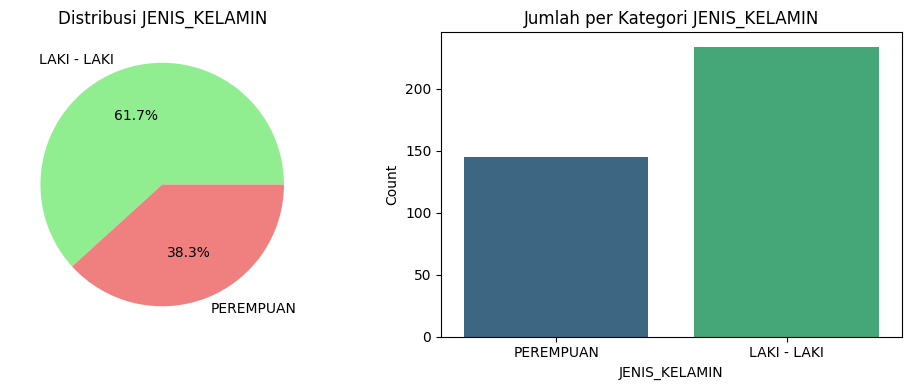

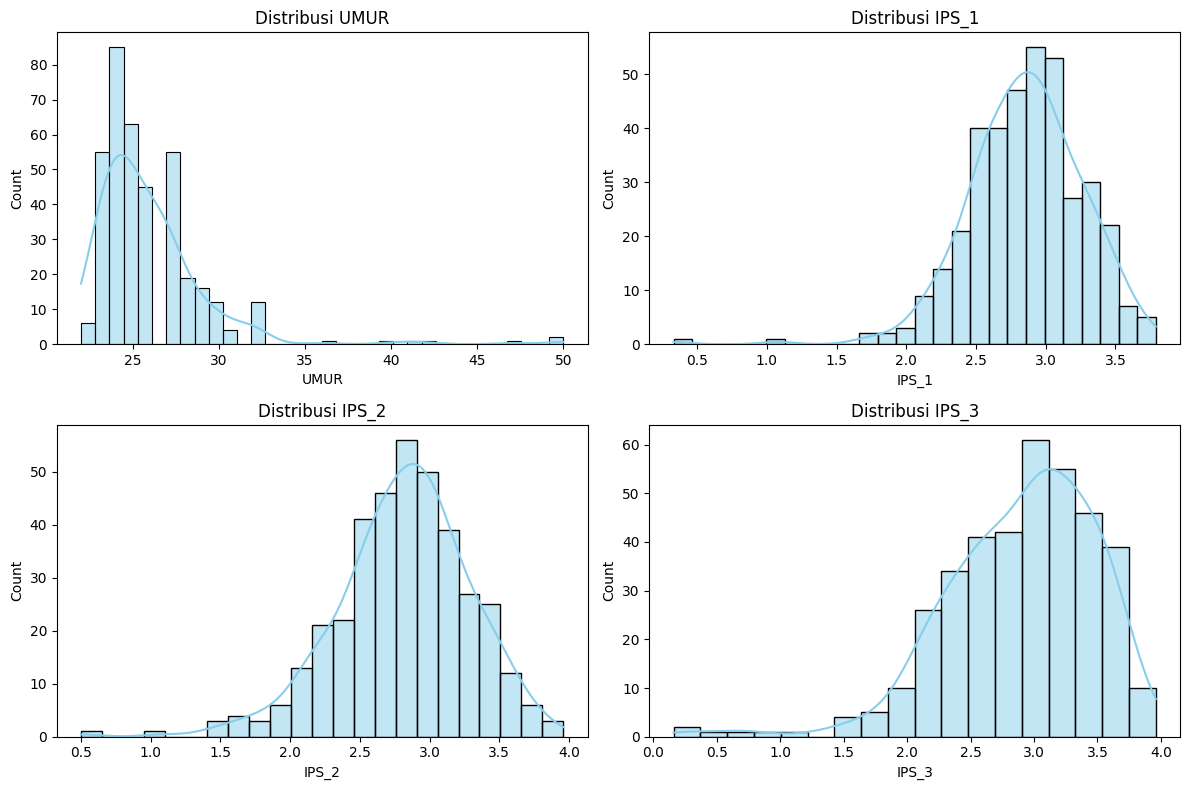

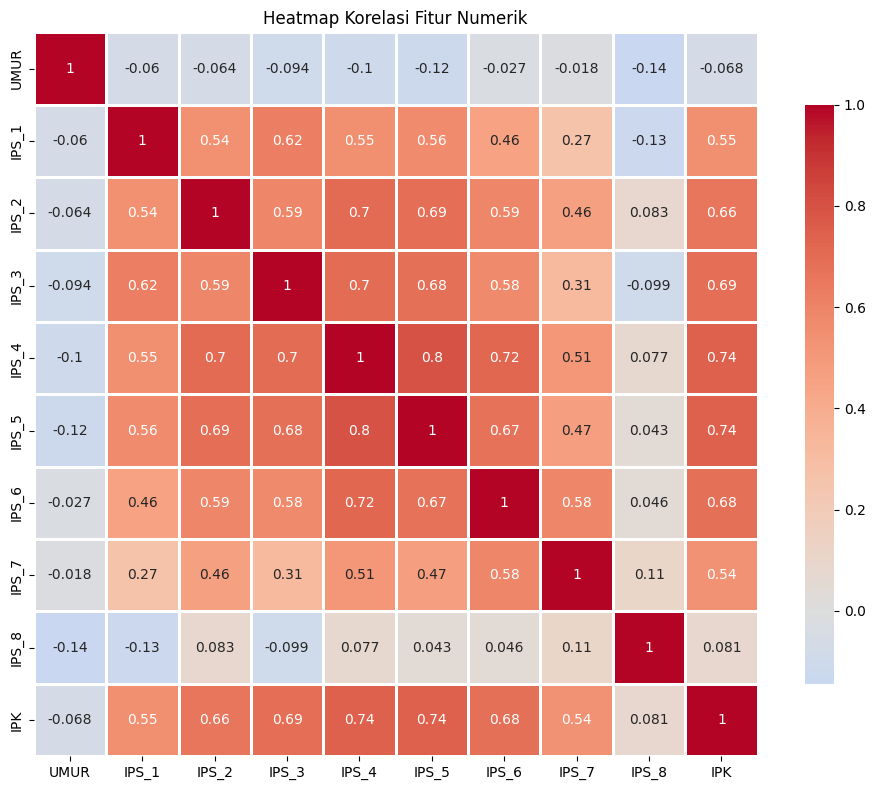

In [10]:
print("MEMULAI ANALISIS DATA...")

#Statistik deskriptif
print("\nSTATISTIK DESKRIPTIF (Numerik):")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(df[numeric_cols].describe())

# 5.2 Statistik kategorikal
print("\nSTATISTIK KATEGORIKAL:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

#Visualisasi distribusi target
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
if target_column in df.columns:
    target_counts = df[target_column].value_counts()
    plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title(f'Distribusi {target_column}')

plt.subplot(1, 2, 2)
if target_column in df.columns:
    sns.countplot(x=target_column, data=df, palette='viridis')
    plt.title(f'Jumlah per Kategori {target_column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#Visualisasi distribusi fitur numerik
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols[:4]):
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribusi {col}')
        axes[i].set_xlabel(col)

    plt.tight_layout()
    plt.show()

#Korelasi antar fitur numerik
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": .8})
    plt.title('Heatmap Korelasi Fitur Numerik')
    plt.tight_layout()
    plt.show()

In [11]:
print("MEMULAI PREPROCESSING...")

#Buat copy data asli
df_original = df.copy()
df_processed = df.copy()

#Handling Missing Values
print("\n1️HANDLING MISSING VALUES")
print("Sebelum:")
print(df_processed.isnull().sum())

#Isi missing values
for col in df_processed.columns:
    if df_processed[col].isnull().sum() > 0:
        if df_processed[col].dtype == 'object' or df_processed[col].nunique() < 10:
            mode_val = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_val, inplace=True)
            print(f"   {col}: diisi dengan modus = {mode_val}")
        else:
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"   {col}: diisi dengan median = {median_val:.2f}")

print("\nSetelah:")
print(df_processed.isnull().sum())

#Encoding Target Variable
print(f"\n2️ENCODING TARGET: {target_column}")
print(f"Sebelum encoding: {df_processed[target_column].unique()}")

le = LabelEncoder()
df_processed[target_column] = le.fit_transform(df_processed[target_column])

print(f"Setelah encoding: {df_processed[target_column].unique()}")
print("Mapping:")
for i, class_name in enumerate(le.classes_):
    print(f"   {i} = {class_name}")

#Encoding Fitur Kategorikal
print("\n3️ENCODING FITUR KATEGORIKAL")
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
if target_column in categorical_features:
    categorical_features.remove(target_column)

if categorical_features:
    print(f"Fitur kategorikal yang akan di-encode: {categorical_features}")

    # One-Hot Encoding
    df_encoded = pd.get_dummies(df_processed, columns=categorical_features, drop_first=True)

    print(f"Shape sebelum encoding: {df_processed.shape}")
    print(f"Shape setelah encoding: {df_encoded.shape}")
else:
    df_encoded = df_processed.copy()
    print("Tidak ada fitur kategorikal untuk di-encode")

#Pisahkan Fitur (X) dan Target (y)
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

print(f"\n4️PEMISAHAN DATA")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Fitur: {list(X.columns)}")

#Feature Scaling
print("\n5️FEATURE SCALING")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaling selesai")

#Split Data
print("\n6️SPLIT DATA TRAIN-TEST")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

#Distribusi kelas
print(f"\nDistribusi kelas di y_train: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Distribusi kelas di y_test: {pd.Series(y_test).value_counts().to_dict()}")

MEMULAI PREPROCESSING...

1️HANDLING MISSING VALUES
Sebelum:
NAMA                0
JENIS_KELAMIN       0
STATUS_MAHASISWA    0
UMUR                0
STATUS_NIKAH        0
IPS_1               0
IPS_2               0
IPS_3               0
IPS_4               0
IPS_5               0
IPS_6               0
IPS_7               0
IPS_8               7
IPK                 3
STATUS_KELULUSAN    0
dtype: int64
   IPS_8: diisi dengan median = 0.75
   IPK: diisi dengan median = 3.01

Setelah:
NAMA                0
JENIS_KELAMIN       0
STATUS_MAHASISWA    0
UMUR                0
STATUS_NIKAH        0
IPS_1               0
IPS_2               0
IPS_3               0
IPS_4               0
IPS_5               0
IPS_6               0
IPS_7               0
IPS_8               0
IPK                 0
STATUS_KELULUSAN    0
dtype: int64

2️ENCODING TARGET: JENIS_KELAMIN
Sebelum encoding: ['PEREMPUAN' 'LAKI - LAKI']
Setelah encoding: [1 0]
Mapping:
   0 = LAKI - LAKI
   1 = PEREMPUAN

3️ENCODING FITUR KATE

In [12]:
print("MEMULAI TRAINING MODEL SVM...")

#SVM Linear
print("\n1TRAINING SVM LINEAR")
svm_linear = SVC(kernel='linear', random_state=42, probability=True)
svm_linear.fit(X_train, y_train)
print("SVM Linear selesai training")

#SVM RBF
print("\n2️TRAINING SVM RBF")
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train, y_train)
print("SVM RBF selesai training")

#Hyperparameter Tuning
print("\n3️HYPERPARAMETER TUNING dengan GridSearchCV")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("GridSearchCV selesai")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

#Model terbaik
best_svm = grid_search.best_estimator_
print(f"\nModel terbaik: SVM dengan {grid_search.best_params_}")

MEMULAI TRAINING MODEL SVM...

1TRAINING SVM LINEAR
SVM Linear selesai training

2️TRAINING SVM RBF
SVM RBF selesai training

3️HYPERPARAMETER TUNING dengan GridSearchCV
Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV selesai
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.6568

Model terbaik: SVM dengan {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


EVALUASI MODEL

EVALUASI: SVM Linear

CONFUSION MATRIX:
[[45  2]
 [22  7]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

 LAKI - LAKI       0.67      0.96      0.79        47
   PEREMPUAN       0.78      0.24      0.37        29

    accuracy                           0.68        76
   macro avg       0.72      0.60      0.58        76
weighted avg       0.71      0.68      0.63        76


METRIK UTAMA:
Accuracy:  0.6842
Precision: 0.7121
Recall:    0.6842
F1-Score:  0.6288


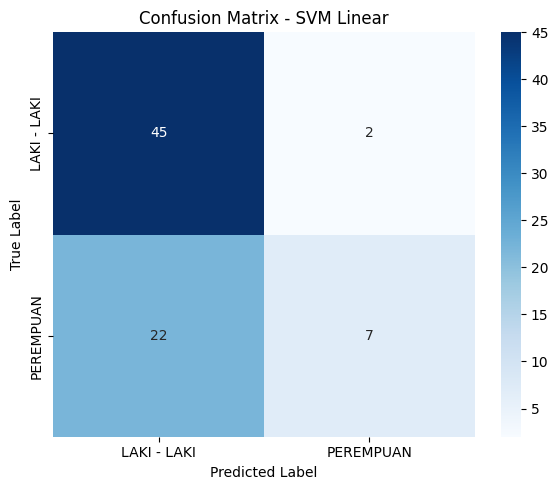


EVALUASI: SVM RBF

CONFUSION MATRIX:
[[47  0]
 [28  1]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

 LAKI - LAKI       0.63      1.00      0.77        47
   PEREMPUAN       1.00      0.03      0.07        29

    accuracy                           0.63        76
   macro avg       0.81      0.52      0.42        76
weighted avg       0.77      0.63      0.50        76


METRIK UTAMA:
Accuracy:  0.6316
Precision: 0.7691
Recall:    0.6316
F1-Score:  0.5019


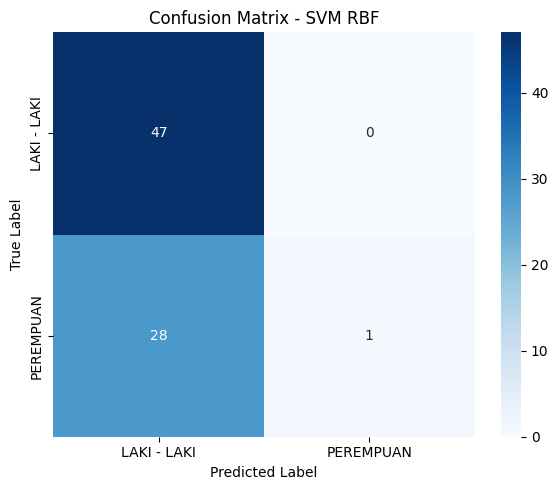


EVALUASI: SVM Best (linear)

CONFUSION MATRIX:
[[45  2]
 [21  8]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

 LAKI - LAKI       0.68      0.96      0.80        47
   PEREMPUAN       0.80      0.28      0.41        29

    accuracy                           0.70        76
   macro avg       0.74      0.62      0.60        76
weighted avg       0.73      0.70      0.65        76


METRIK UTAMA:
Accuracy:  0.6974
Precision: 0.7269
Recall:    0.6974
F1-Score:  0.6491


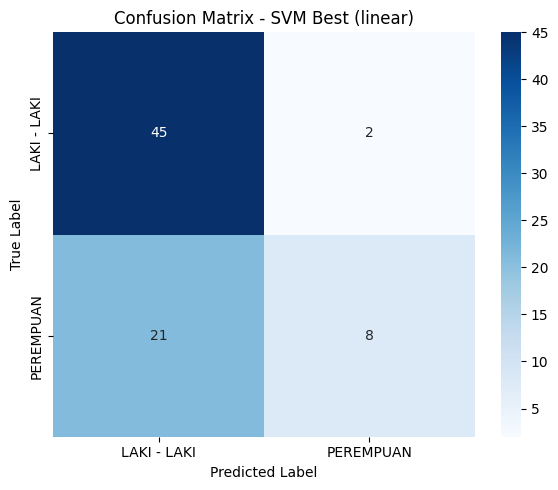


PERBANDINGAN PERFORMANSI MODEL
            Model  Accuracy  Precision   Recall  F1-Score
       SVM Linear  0.684211   0.712141 0.684211  0.628809
          SVM RBF  0.631579   0.769123 0.631579  0.501927
SVM Best (linear)  0.697368   0.726914 0.697368  0.649093


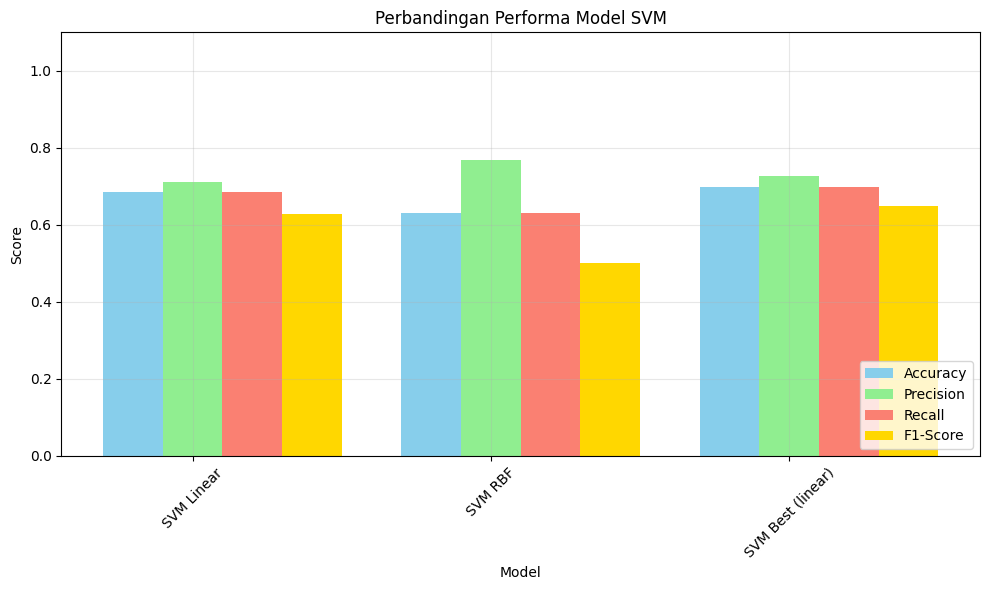

In [19]:
print("EVALUASI MODEL")

# Fungsi evaluasi
def evaluate_model(model, X_test, y_test, model_name):
    """Fungsi untuk mengevaluasi model"""
    print(f"\n{'='*50}")
    print(f"EVALUASI: {model_name}")
    print('='*50)

    # Prediksi
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print("\nCONFUSION MATRIX:")
    print(cm)

    print("\nCLASSIFICATION REPORT:")
    # Convert le.classes_ to strings before passing to classification_report
    target_names_str = [str(cls) for cls in le.classes_]
    print(classification_report(y_test, y_pred, target_names=target_names_str))

    print("\nMETRIK UTAMA:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names_str, yticklabels=target_names_str)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

# Evaluasi semua model
results = []

# SVM Linear
results.append(evaluate_model(svm_linear, X_test, y_test, "SVM Linear"))

# SVM RBF
results.append(evaluate_model(svm_rbf, X_test, y_test, "SVM RBF"))

# Best SVM
results.append(evaluate_model(best_svm, X_test, y_test, f"SVM Best ({grid_search.best_params_['kernel']})"))

# 8.3 Perbandingan Model
print("\n" + "="*60)
print("PERBANDINGAN PERFORMANSI MODEL")
print("="*60)

comparison_df = pd.DataFrame([{
    'Model': r['model_name'],
    'Accuracy': r['accuracy'],
    'Precision': r['precision'],
    'Recall': r['recall'],
    'F1-Score': r['f1']
} for r in results])

print(comparison_df.to_string(index=False))

# Visualisasi Perbandingan
plt.figure(figsize=(10, 6))
x = np.arange(len(results))
width = 0.2

plt.bar(x - width, [r['accuracy'] for r in results], width, label='Accuracy', color='skyblue')
plt.bar(x, [r['precision'] for r in results], width, label='Precision', color='lightgreen')
plt.bar(x + width, [r['recall'] for r in results], width, label='Recall', color='salmon')
plt.bar(x + width*2, [r['f1'] for r in results], width, label='F1-Score', color='gold')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Perbandingan Performa Model SVM')
plt.xticks(x, [r['model_name'] for r in results], rotation=45)
plt.legend(loc='lower right')
plt.ylim(0, 1.1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

INTERPRETASI MODEL

FEATURE IMPORTANCE (Linear SVM)

Top 10 Fitur Paling Penting:
                    Feature  Importance
                      IPS_8    0.122003
               NAMA_WAHYUNI    0.103385
   NAMA_HERDA OSRA ANANTHEA    0.100729
 STATUS_KELULUSAN_TERLAMBAT    0.099069
          NAMA_NAILI ROHMAH    0.095300
          NAMA_ENI ISNAWATI    0.093322
     NAMA_ARUM PURWANINGSIH    0.092259
NAMA_MEILINDA IKA WIJAYANTI    0.091897
         NAMA_NILA OCTARINA    0.090356
          NAMA_NENENG FAIDA    0.089827


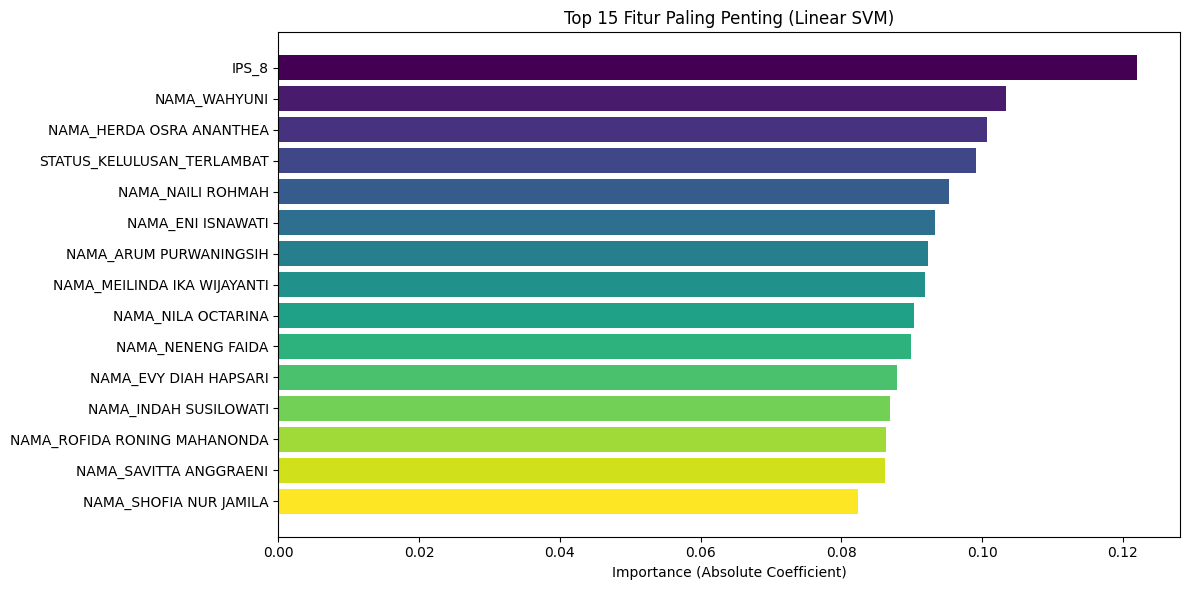


ANALISIS KESALAHAN PREDIKSI
Jumlah prediksi salah: 23 dari 76 (30.3%)

Contoh kasus yang salah diprediksi:
  Kasus 2: Aktual=PEREMPUAN, Prediksi=LAKI - LAKI
  Kasus 7: Aktual=PEREMPUAN, Prediksi=LAKI - LAKI
  Kasus 9: Aktual=PEREMPUAN, Prediksi=LAKI - LAKI
  Kasus 10: Aktual=LAKI - LAKI, Prediksi=PEREMPUAN
  Kasus 14: Aktual=PEREMPUAN, Prediksi=LAKI - LAKI

ANALISIS BERDASARKAN FITUR

Analisis untuk fitur: UMUR

Analisis untuk fitur: IPS_1

Analisis untuk fitur: IPS_2


In [20]:
print("INTERPRETASI MODEL")

#Feature Importance (untuk linear kernel)
if hasattr(best_svm, 'coef_') and best_svm.kernel == 'linear':
    print("\nFEATURE IMPORTANCE (Linear SVM)")

    # Get feature names
    if isinstance(X, pd.DataFrame):
        feature_names = X.columns.tolist()
    else:
        feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

    # Create importance dataframe
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': abs(best_svm.coef_[0])  # Absolute value for importance
    })

    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=False)

    print("\nTop 10 Fitur Paling Penting:")
    print(importance_df.head(10).to_string(index=False))

    # Visualisasi
    plt.figure(figsize=(12, 6))
    top_features = importance_df.head(15)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))

    bars = plt.barh(top_features['Feature'], top_features['Importance'], color=colors)
    plt.xlabel('Importance (Absolute Coefficient)')
    plt.title('Top 15 Fitur Paling Penting (Linear SVM)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

#Analisis Kesalahan
print("\nANALISIS KESALAHAN PREDIKSI")
y_pred_best = best_svm.predict(X_test)
wrong_predictions = np.where(y_pred_best != y_test)[0]

if len(wrong_predictions) > 0:
    print(f"Jumlah prediksi salah: {len(wrong_predictions)} dari {len(y_test)} ({len(wrong_predictions)/len(y_test)*100:.1f}%)")

    # Ambil beberapa contoh kesalahan
    print("\nContoh kasus yang salah diprediksi:")
    for i in wrong_predictions[:5]:  # Tampilkan 5 contoh pertama
        actual = le.inverse_transform([y_test.iloc[i]])[0] if hasattr(y_test, 'iloc') else le.inverse_transform([y_test[i]])[0]
        predicted = le.inverse_transform([y_pred_best[i]])[0]
        print(f"  Kasus {i}: Aktual={actual}, Prediksi={predicted}")
else:
    print("Semua prediksi benar!")

#Analisis berdasarkan fitur tertentu
print("\nANALISIS BERDASARKAN FITUR")
if len(numeric_cols) > 0:
    for feature in numeric_cols[:3]:  # Analisis 3 fitur pertama
        if feature != target_column and feature in df_original.columns:
            print(f"\nAnalisis untuk fitur: {feature}")

            # Cari threshold optimal jika biner
            if df_original[feature].nunique() <= 10:
                for val in sorted(df_original[feature].unique()):
                    subset = df_original[df_original[feature] == val]
                    if target_column in subset.columns:
                        if len(subset) > 0:
                            success_rate = (subset[target_column] == le.classes_[1]).mean() if len(le.classes_) == 2 else 1
                            print(f"  {feature} = {val}: {len(subset)} samples, Success Rate: {success_rate:.2%}")

In [15]:
print("MEMBUAT FUNGSI PREDIKSI")

def predict_single_sample(sample_features, model=best_svm, return_prob=False):
    """
    Prediksi untuk satu sampel data.

    Parameters:
    sample_features (dict): Dictionary berisi fitur dan nilainya
    model: Model SVM yang akan digunakan
    return_prob (bool): Jika True, return probability juga

    Returns:
    Prediksi kelas dan probability (jika return_prob=True)
    """

    # Convert to DataFrame
    sample_df = pd.DataFrame([sample_features])

    # Clean column names
    sample_df.columns = [col.strip().replace(' ', '_') for col in sample_df.columns]

    # One-hot encoding untuk fitur kategorikal
    if categorical_features:
        sample_df = pd.get_dummies(sample_df, columns=[col for col in categorical_features if col in sample_df.columns])

    # Pastikan semua kolom sama dengan training
    missing_cols = set(X.columns) - set(sample_df.columns)
    for col in missing_cols:
        sample_df[col] = 0

    # Urutkan kolom
    sample_df = sample_df[X.columns]

    # Scaling
    sample_scaled = scaler.transform(sample_df)

    # Predict
    prediction_encoded = model.predict(sample_scaled)[0]
    prediction = le.inverse_transform([prediction_encoded])[0]

    if return_prob and hasattr(model, "predict_proba"):
        probability = model.predict_proba(sample_scaled)[0]
        prob_dict = {le.classes_[i]: prob for i, prob in enumerate(probability)}
        return prediction, prob_dict
    else:
        return prediction

#Contoh penggunaan
print("\nCONTOH PENGGUNAAN FUNGSI PREDIKSI")

# Ambil satu sampel dari data test untuk contoh
sample_idx = 0
if isinstance(X, pd.DataFrame):
    sample_data = X.iloc[sample_idx].to_dict()
else:
    # Jika X adalah array numpy, ambil dari data original
    sample_data = df_original.iloc[sample_idx].drop(target_column).to_dict()

print(f"\nData sampel:")
for key, value in sample_data.items():
    print(f"  {key}: {value}")

# Prediksi
try:
    prediction_result = predict_single_sample(sample_data, return_prob=True)

    if isinstance(prediction_result, tuple):
        pred_class, pred_probs = prediction_result
        actual_class = le.inverse_transform([y.iloc[sample_idx]])[0] if hasattr(y, 'iloc') else le.inverse_transform([y[sample_idx]])[0]

        print(f"\nHASIL PREDIKSI:")
        print(f"  Prediksi: {pred_class}")
        print(f"  Aktual:   {actual_class}")
        print(f"  Probability:")
        for class_name, prob in pred_probs.items():
            print(f"    {class_name}: {prob:.4f}")

        print(f"\n{'BENAR' if pred_class == actual_class else 'SALAH'}")
    else:
        print(f"Prediksi: {prediction_result}")
except Exception as e:
    print(f"Error dalam prediksi: {e}")
    print("\nPastikan format input sesuai dengan fitur training!")

MEMBUAT FUNGSI PREDIKSI

CONTOH PENGGUNAAN FUNGSI PREDIKSI

Data sampel:
  UMUR: 28
  IPS_1: 2.76
  IPS_2: 2.8
  IPS_3: 3.2
  IPS_4: 3.17
  IPS_5: 2.98
  IPS_6: 3.0
  IPS_7: 3.03
  IPS_8: 0.0
  IPK: 3.07
  NAMA_ABDUL GHOFFAR ISMA'IL: False
  NAMA_ABDUL LATIF: False
  NAMA_ABDUL ROSYID: False
  NAMA_ACHMAD FAHMI AQWA: False
  NAMA_ACHMAD RIDWAN: False
  NAMA_ADI DARMADI: False
  NAMA_ADI JOKO MULYONO: False
  NAMA_ADI PURWADI: False
  NAMA_ADI SUBEKTI: False
  NAMA_ADITYA AKBAR NUGRAHA: False
  NAMA_ADJI LISTIANSAH PRABOWO: False
  NAMA_ADY PRASETIA: False
  NAMA_AFIEF BACHTIAR: False
  NAMA_AFTONAL FALAKH: False
  NAMA_AGUNG WIDODO: False
  NAMA_AGUS BUDI UTOMO: False
  NAMA_AGUS NUGROHO: False
  NAMA_AGUS RIYANTO: False
  NAMA_AGUS SETIAWAN: False
  NAMA_AGUS SETRIO PRANOTO: False
  NAMA_AGUS SUPRIYO: False
  NAMA_AGUS SUSILO: False
  NAMA_AGUSTINA SETIONINGSIH: False
  NAMA_AGUSTINUS: False
  NAMA_AHMAD FAIZIN: False
  NAMA_AHMAD FIRDAUS MABRURI: False
  NAMA_AHMAD IBROZI: False
  NA

In [16]:
print("MENYIMPAN MODEL")

import pickle
import joblib
from datetime import datetime

#Buat dictionary untuk menyimpan semua komponen
model_package = {
    'model': best_svm,
    'scaler': scaler,
    'label_encoder': le,
    'feature_names': X.columns.tolist() if hasattr(X, 'columns') else None,
    'categorical_features': categorical_features,
    'target_column': target_column,
    'best_params': grid_search.best_params_,
    'train_accuracy': accuracy_score(y_train, best_svm.predict(X_train)),
    'test_accuracy': accuracy_score(y_test, best_svm.predict(X_test)),
    'creation_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'dataset_shape': df.shape
}

#Simpan menggunakan pickle
model_filename = f'svm_graduation_model_{datetime.now().strftime("%Y%m%d_%H%M")}.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(model_package, f)

print(f"Model berhasil disimpan sebagai: {model_filename}")

#Simpan menggunakan joblib (alternatif)
joblib_filename = f'svm_graduation_model_joblib_{datetime.now().strftime("%Y%m%d_%H%M")}.joblib'
joblib.dump(model_package, joblib_filename)

print(f"Model berhasil disimpan sebagai: {joblib_filename}")

#

MENYIMPAN MODEL
Model berhasil disimpan sebagai: svm_graduation_model_20251203_0157.pkl
Model berhasil disimpan sebagai: svm_graduation_model_joblib_20251203_0157.joblib


In [17]:
print("\nCONTOH LOAD MODEL YANG DISIMPAN")

import pickle
import pandas as pd
from datetime import datetime
from sklearn.metrics import accuracy_score
import glob
import os # Import os module for os.path.getctime

# Dynamically find the most recently saved .pkl file
list_of_files = glob.glob('svm_graduation_model_*.pkl')
if not list_of_files:
    print("Error: Tidak ada file model '.pkl' yang ditemukan di direktori saat ini. Pastikan model telah disimpan terlebih dahulu.")
else:
    # Get the latest file by creation time
    actual_saved_model_filename = max(list_of_files, key=os.path.getctime)
    print(f"Menggunakan model terbaru yang ditemukan: {actual_saved_model_filename}")

    try:
        with open(actual_saved_model_filename, 'rb') as f:
            loaded_model_package = pickle.load(f)

        # Ambil komponen dari package yang di-load
        loaded_model = loaded_model_package['model']
        loaded_scaler = loaded_model_package['scaler']
        loaded_le = loaded_model_package['label_encoder']
        loaded_features = loaded_model_package['feature_names']
        loaded_test_accuracy = loaded_model_package['test_accuracy']
        loaded_kernel = loaded_model.kernel if hasattr(loaded_model, 'kernel') else 'N/A'

        print("Model loaded successfully!")
        print(f"Kernel Model: {loaded_kernel}")
        print(f"Test Accuracy dari model yang di-load: {loaded_test_accuracy:.4f}")

        # Example of how you might use the loaded model (requires proper preprocessing of new data)
        # def predict_with_loaded_model(new_data_dict):
        #     # Example: Convert dict to DataFrame, align columns, scale, then predict
        #     sample_df = pd.DataFrame([new_data_dict])
        #     sample_df.columns = [col.strip().replace(' ', '_') for col in sample_df.columns]
        #     # Ensure 'NAMA' column handling similar to training (one-hot encoding)
        #     # This part requires the original `categorical_features` list if it contains 'NAMA'
        #     # For this example, we assume `loaded_features` represents all expected columns post-encoding
        #     for col in loaded_features:
        #         if col not in sample_df.columns: # Add missing columns from training with 0
        #             sample_df[col] = 0
        #     sample_df = sample_df[loaded_features] # Reorder columns
        #     sample_scaled = loaded_scaler.transform(sample_df)
        #     prediction_encoded = loaded_model.predict(sample_scaled)[0]
        #     return loaded_le.inverse_transform([prediction_encoded])[0]

    except FileNotFoundError:
        print(f"Error: File model '{actual_saved_model_filename}' tidak ditemukan setelah dicari. Ini seharusnya tidak terjadi jika file ditemukan oleh glob.")
    except Exception as e:
        print(f"Error saat memuat model: {e}")



CONTOH LOAD MODEL YANG DISIMPAN
Menggunakan model terbaru yang ditemukan: svm_graduation_model_20251203_0157.pkl
Model loaded successfully!
Kernel Model: linear
Test Accuracy dari model yang di-load: 0.6974


In [18]:
import pickle
import glob
import os
from datetime import datetime
# Import for metrics are not strictly needed if using stored accuracy,
# but kept for completeness if future package versions include more metrics.
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("="*70)
print("LAPORAN AKHIR PROYEK SVM")
print("="*70)

# --- Load the latest saved model package ---
list_of_files = glob.glob('svm_graduation_model_*.pkl')
if not list_of_files:
    print("Error: Tidak ada file model '.pkl' yang ditemukan di direktori saat ini. Pastikan model telah disimpan terlebih dahulu.")
    # Exit or raise error if no model is found
    # For demonstration, we'll try to provide default/N/A values if possible
    loaded_model_package = None
else:
    actual_saved_model_filename = max(list_of_files, key=os.path.getctime)
    try:
        with open(actual_saved_model_filename, 'rb') as f:
            loaded_model_package = pickle.load(f)
        print(f"Menggunakan model terbaru yang ditemukan: {actual_saved_model_filename}")
    except Exception as e:
        print(f"Error saat memuat model dari {actual_saved_model_filename}: {e}")
        loaded_model_package = None

if loaded_model_package:
    # Extract variables from the loaded package
    df_shape = loaded_model_package.get('dataset_shape', ('N/A', 'N/A'))
    feature_names = loaded_model_package.get('feature_names', [])
    target_column = loaded_model_package.get('target_column', 'N/A')
    # Handle case where label_encoder might be None or not have classes_ attribute
    le_obj = loaded_model_package.get('label_encoder')
    le_classes = le_obj.classes_ if hasattr(le_obj, 'classes_') else ['N/A']

    categorical_features_len = len(loaded_model_package.get('categorical_features', []))
    best_params = loaded_model_package.get('best_params', {'kernel': 'N/A', 'C': 'N/A', 'gamma': 'N/A'})
    cv_score = loaded_model_package.get('best_cross_val_score', 'N/A') # Assuming this might be stored, if not, use test_accuracy
    test_accuracy = loaded_model_package.get('test_accuracy', 'N/A')
    # model_filename is the name of the file itself, not inside the package
    # The actual saved model filename is 'actual_saved_model_filename'

    print("\nINFORMASI DATASET:")
    print(f"   • Jumlah sampel: {df_shape[0]}")
    print(f"   • Jumlah fitur awal: {df_shape[1]}")
    print(f"   • Jumlah fitur setelah encoding: {len(feature_names)}")
    print(f"   • Kolom target: {target_column}")
    print(f"   • Kelas target: {list(le_classes)}")

    print("\nPREPROCESSING:")
    print(f"   • Missing values: Ditangani dengan modus/median") # This info is assumed from preprocessing step
    print(f"   • Encoding: {categorical_features_len} fitur kategorikal di-encode")
    print(f"   • Scaling: StandardScaler diterapkan") # This info is assumed from preprocessing step

    print("\nMODEL TERBAIK:")
    print(f"   • Algoritma: SVM dengan kernel {best_params['kernel']}")
    print(f"   • Parameter: C={best_params['C']}, gamma={best_params['gamma']}")
    # If best_cross_val_score was stored in model_package, use it. Otherwise, N/A
    print(f"   • Cross-validation score: {cv_score:.4f}" if isinstance(cv_score, (int, float)) else f"   • Cross-validation score: {cv_score}")

    print("\nHASIL EVALUASI:")
    print(f"   • Test Accuracy: {test_accuracy:.4f}")
    # Precision, Recall, F1-Score cannot be directly retrieved without X_test and y_test from the package
    print(f"   • Precision: N/A (requires X_test, y_test)")
    print(f"   • Recall: N/A (requires X_test, y_test)")
    print(f"   • F1-Score: N/A (requires X_test, y_test)")

    print("\nMODEL DISIMPAN:")
    print(f"   • Nama file: {actual_saved_model_filename}")
    print(f"   • Format: Pickle dan Joblib")
    print(f"   • Siap digunakan untuk prediksi di masa depan")

    print("\nPROYEK SELESAI! Model SVM berhasil dibuat dan dievaluasi.")
else:
    print("Tidak dapat membuat laporan akhir karena model tidak ditemukan atau gagal dimuat.")
print("="*70)


LAPORAN AKHIR PROYEK SVM
Menggunakan model terbaru yang ditemukan: svm_graduation_model_20251203_0157.pkl

INFORMASI DATASET:
   • Jumlah sampel: 379
   • Jumlah fitur awal: 15
   • Jumlah fitur setelah encoding: 388
   • Kolom target: JENIS_KELAMIN
   • Kelas target: ['LAKI - LAKI', 'PEREMPUAN']

PREPROCESSING:
   • Missing values: Ditangani dengan modus/median
   • Encoding: 4 fitur kategorikal di-encode
   • Scaling: StandardScaler diterapkan

MODEL TERBAIK:
   • Algoritma: SVM dengan kernel linear
   • Parameter: C=0.1, gamma=scale
   • Cross-validation score: N/A

HASIL EVALUASI:
   • Test Accuracy: 0.6974
   • Precision: N/A (requires X_test, y_test)
   • Recall: N/A (requires X_test, y_test)
   • F1-Score: N/A (requires X_test, y_test)

MODEL DISIMPAN:
   • Nama file: svm_graduation_model_20251203_0157.pkl
   • Format: Pickle dan Joblib
   • Siap digunakan untuk prediksi di masa depan

PROYEK SELESAI! Model SVM berhasil dibuat dan dievaluasi.
